<a href="https://colab.research.google.com/github/varunjain3/CapMarket/blob/master/FinanceProject2020Sem5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [149]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


# ICICI

In [ ]:
df=pd.read_csv("ICICI_clean.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

In [30]:
start_date = "2015-03-31"
test_set = df[df["Date"] >= start_date].iloc[:,5:6]
training_set = df[df["Date"] < start_date].iloc[:,5:6]
print(training_set.shape,test_set.shape)
print(test_set.head(5))

(3146, 1) (986, 1)
           Close
3146  286.817993
3147  293.773010
3148  292.045013
3149  288.545013
3150  286.454987


In [32]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#(740, 60, 1)

(3086, 60, 1)


In [140]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse',metrics=['mae', 'mape'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 8, batch_size = 1024)

Epoch 1/8
4/4 [==============================] - 0s 74ms/step - loss: 0.1449 - mae: 0.3197 - mape: 305.7688
Epoch 2/8
4/4 [==============================] - 0s 74ms/step - loss: 0.0261 - mae: 0.1364 - mape: 58463.2266
Epoch 3/8
4/4 [==============================] - 0s 69ms/step - loss: 0.0134 - mae: 0.0951 - mape: 42071.0234
Epoch 4/8
4/4 [==============================] - 0s 66ms/step - loss: 0.0180 - mae: 0.1050 - mape: 34574.3984
Epoch 5/8
4/4 [==============================] - 0s 66ms/step - loss: 0.0081 - mae: 0.0734 - mape: 39499.5195
Epoch 6/8
4/4 [==============================] - 0s 65ms/step - loss: 0.0099 - mae: 0.0848 - mape: 37215.1328
Epoch 7/8
4/4 [==============================] - 0s 64ms/step - loss: 0.0065 - mae: 0.0584 - mape: 12771.4336
Epoch 8/8
4/4 [==============================] - 0s 64ms/step - loss: 0.0060 - mae: 0.0546 - mape: 9974.6504


In [137]:
# Getting the predicted stock price of 2017
start_date = "2015-03-31"

dataset_train = df[df["Date"] < start_date].iloc[:,5:6]
dataset_test = df[df["Date"] >= start_date].iloc[:,5:6]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(986, 60, 1)


In [141]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [99]:
noise = np.random.rand(predicted_stock_price.size)*5
noise.shape

(986,)

In [ ]:
noise

In [75]:
df.loc[:len(dataset_train)-1, 'Date'].shape,dataset_train.values.shape

((3147,), (3146, 1))

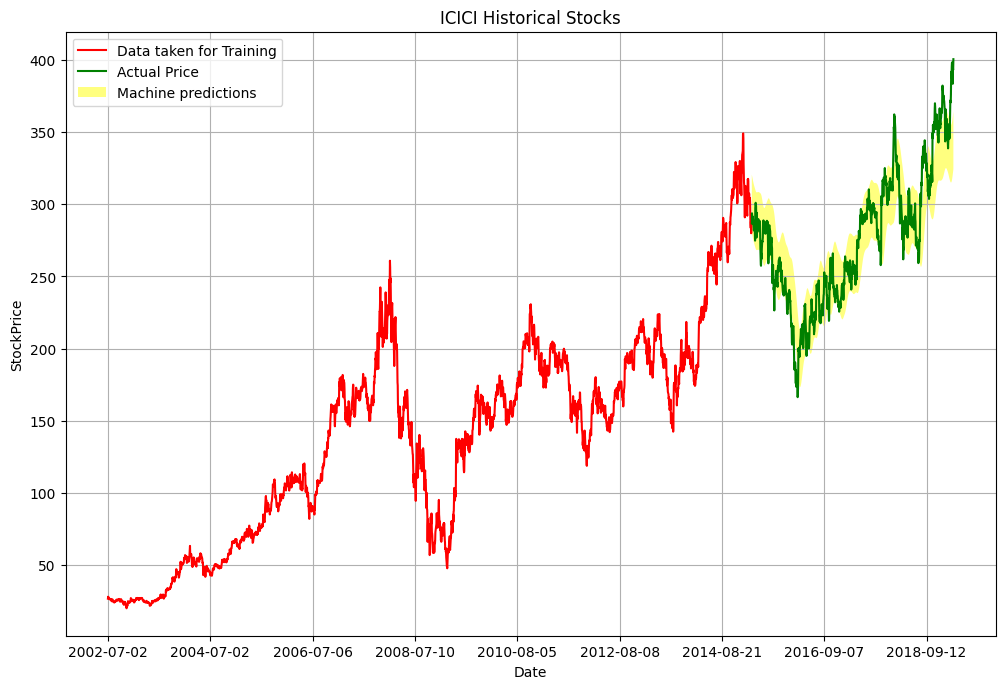

In [143]:
# Nicely Visualizing values
plt.figure(figsize=(12,8), dpi= 100)
plt.plot(df.loc[:len(dataset_train)-1, 'Date'],dataset_train.values, color = 'Red', label = 'Data taken for Training')
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],dataset_test.values, color = 'green', label = 'Actual Price')
plt.fill_between(df.loc[len(dataset_total) - len(dataset_test):, 'Date'], (predicted_stock_price+20).flatten(),
                 (predicted_stock_price-20).flatten(), facecolor='yellow',
                alpha=0.5,label = "Machine predictions")
plt.xticks(np.arange(0,len(dataset_total), step=500))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("StockPrice")
plt.legend()
plt.title("ICICI Historical Stocks")
plt.savefig("ICICI.jpg")
plt.show()


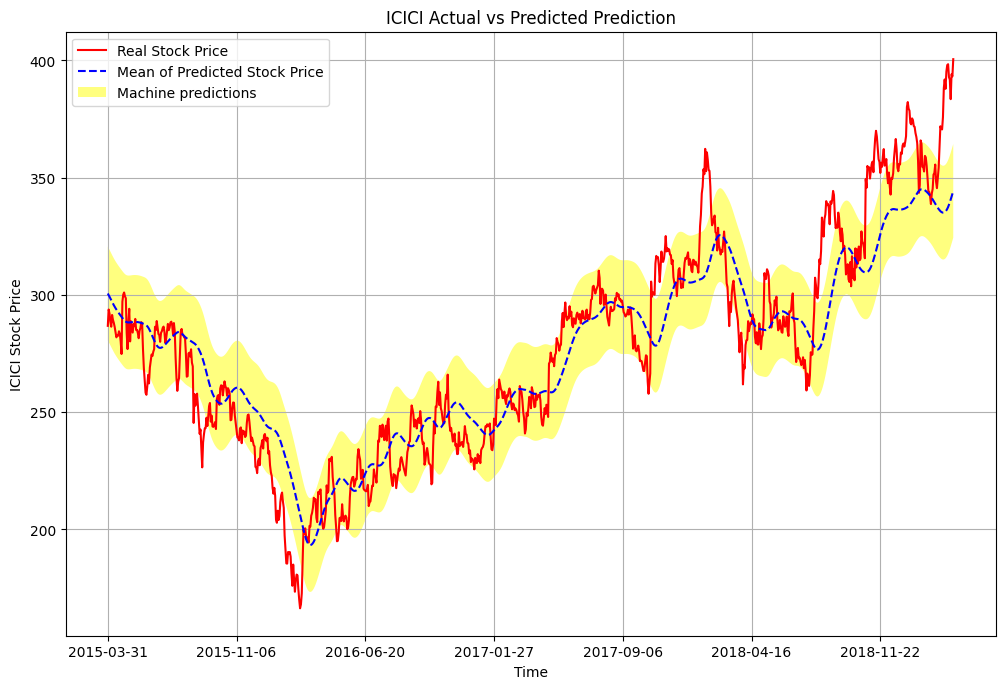

In [142]:
# Visualising the results
plt.figure(figsize=(12,8), dpi= 100)
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],dataset_test.values, color = 'red', label = 'Real Stock Price')
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],predicted_stock_price, "--",color = 'blue', label = 'Mean of Predicted Stock Price')
plt.fill_between(df.loc[len(dataset_total) - len(dataset_test):, 'Date'], (predicted_stock_price+20).flatten(),
                 (predicted_stock_price-20).flatten(), facecolor='yellow',
                alpha=0.5,label = "Machine predictions")
plt.title('ICICI Actual vs Predicted Prediction')
plt.xlabel('Time')
plt.ylabel('ICICI Stock Price')
plt.xticks(np.arange(0,len(predicted_stock_price), step=150))
plt.grid(True)
plt.legend()
plt.savefig("ICICI_Pred_Actual.jpg")
plt.show()

In [148]:
data = {"Data":df.loc[len(dataset_total) - len(dataset_test):, 'Date'].values,
        "Closing Price Predicted":predicted_stock_price.flatten()}
results = pd.DataFrame(data)
results.to_excel("ICICI_predicted.xlsx")

# Asian Paints

In [151]:
df=pd.read_csv("ASIANPAINT_clean.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (4812, 8)


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2000-01-04,23.7500,24.4688,23.375000,24.3750,0.836142,222840.0
1,1,2000-01-05,24.0625,24.1250,23.456200,24.1250,0.827567,168648.0
2,2,2000-01-06,24.0000,24.0625,23.565599,23.7500,0.814703,127728.0
3,3,2000-01-07,23.4375,24.2500,23.437500,23.9375,0.821135,3416664.0
4,4,2000-01-10,25.0000,25.8500,25.000000,25.8500,0.886740,831960.0


In [152]:
start_date = "2015-03-31"
test_set = df[df["Date"] >= start_date].iloc[:,5:6]
training_set = df[df["Date"] < start_date].iloc[:,5:6]
print(training_set.shape,test_set.shape)
print(test_set.head(5))

(3826, 1) (986, 1)
           Close
3826  808.750000
3827  821.000000
3828  822.450012
3829  835.299988
3830  847.150024


In [153]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#(740, 60, 1)

(3766, 60, 1)


In [170]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse',metrics=['mae', 'mape'])

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 30, batch_size = 1024)

Epoch 1/30
4/4 [==============================] - 0s 87ms/step - loss: 0.0562 - mae: 0.1474 - mape: 10204.9375
Epoch 2/30
4/4 [==============================] - 0s 75ms/step - loss: 0.0169 - mae: 0.1161 - mape: 38212.3906
Epoch 3/30
4/4 [==============================] - 0s 74ms/step - loss: 0.0072 - mae: 0.0695 - mape: 10890.1318
Epoch 4/30
4/4 [==============================] - 0s 73ms/step - loss: 0.0055 - mae: 0.0455 - mape: 2899.7021
Epoch 5/30
4/4 [==============================] - 0s 73ms/step - loss: 0.0038 - mae: 0.0417 - mape: 4221.3892
Epoch 6/30
4/4 [==============================] - 0s 73ms/step - loss: 0.0022 - mae: 0.0351 - mape: 7564.3179
Epoch 7/30
4/4 [==============================] - 0s 73ms/step - loss: 0.0024 - mae: 0.0283 - mape: 1832.4253
Epoch 8/30
4/4 [==============================] - 0s 72ms/step - loss: 0.0019 - mae: 0.0328 - mape: 8134.2104
Epoch 9/30
4/4 [==============================] - 0s 73ms/step - loss: 0.0018 - mae: 0.0290 - mape: 7881.5791
Epoch 1

In [171]:
# Getting the predicted stock price of 2017
start_date = "2015-03-31"

dataset_train = df[df["Date"] < start_date].iloc[:,5:6]
dataset_test = df[df["Date"] >= start_date].iloc[:,5:6]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(986, 60, 1)


In [172]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

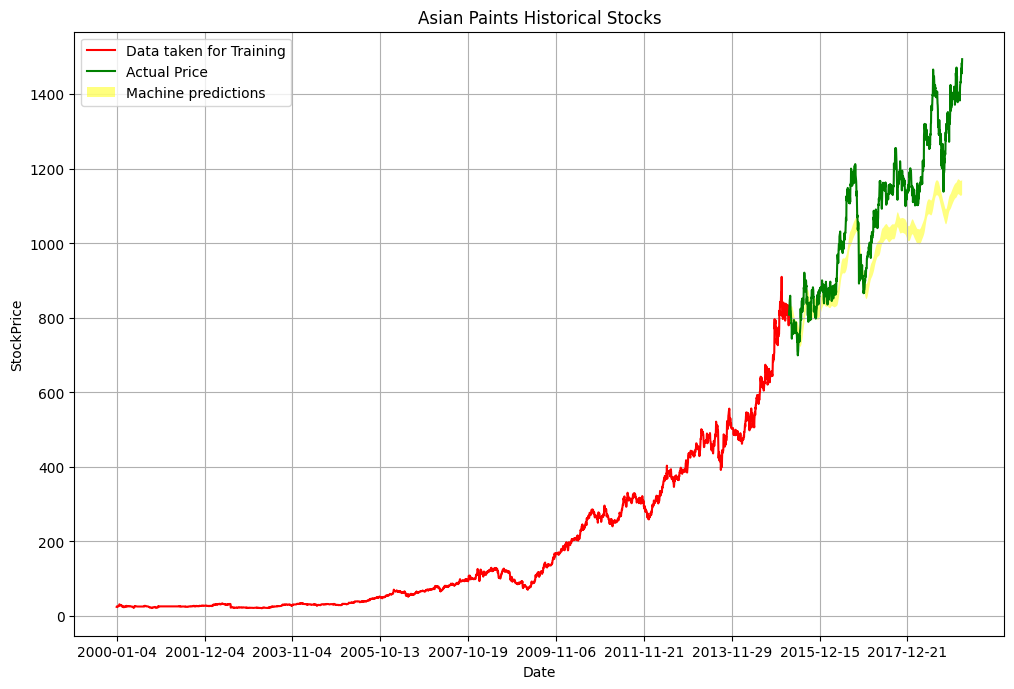

In [173]:
# Nicely Visualizing values
plt.figure(figsize=(12,8), dpi= 100)
plt.plot(df.loc[:len(dataset_train)-1, 'Date'],dataset_train.values, color = 'Red', label = 'Data taken for Training')
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],dataset_test.values, color = 'green', label = 'Actual Price')
plt.fill_between(df.loc[len(dataset_total) - len(dataset_test):, 'Date'], (predicted_stock_price+20).flatten(),
                 (predicted_stock_price-20).flatten(), facecolor='yellow',
                alpha=0.5,label = "Machine predictions")
plt.xticks(np.arange(0,len(dataset_total), step=500))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("StockPrice")
plt.legend()
plt.title("Asian Paints Historical Stocks")
plt.savefig("Asian Paints.jpg")
plt.show()


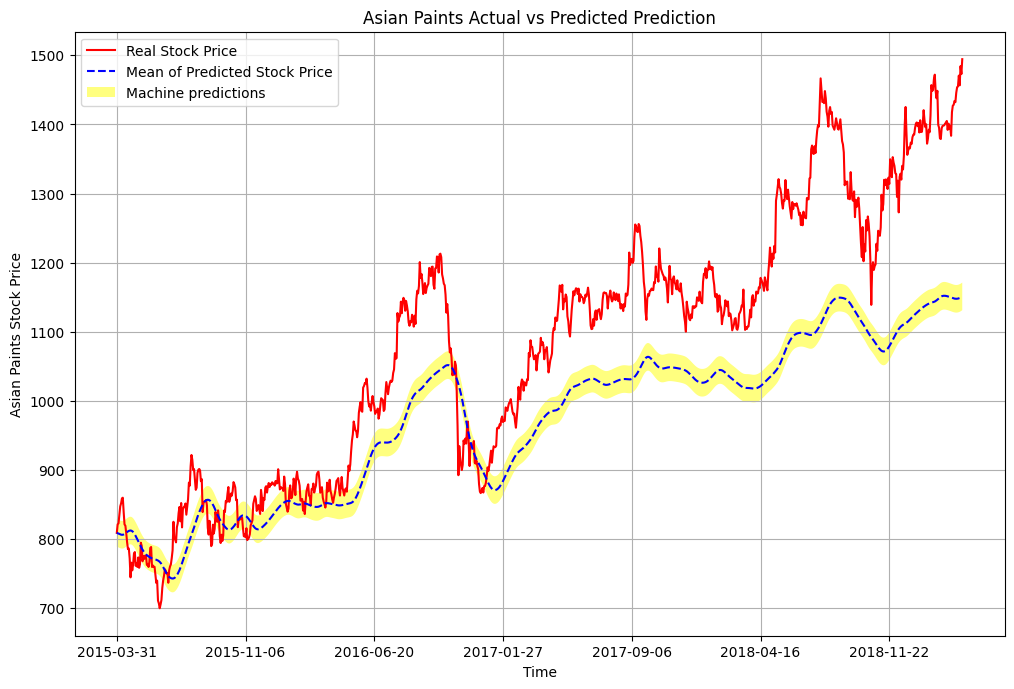

In [174]:
# Visualising the results
plt.figure(figsize=(12,8), dpi= 100)
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],dataset_test.values, color = 'red', label = 'Real Stock Price')
plt.plot(df.loc[len(dataset_total) - len(dataset_test):, 'Date'],predicted_stock_price, "--",color = 'blue', label = 'Mean of Predicted Stock Price')
plt.fill_between(df.loc[len(dataset_total) - len(dataset_test):, 'Date'], (predicted_stock_price+20).flatten(),
                 (predicted_stock_price-20).flatten(), facecolor='yellow',
                alpha=0.5,label = "Machine predictions")
plt.title('Asian Paints Actual vs Predicted Prediction')
plt.xlabel('Time')
plt.ylabel('Asian Paints Stock Price')
plt.xticks(np.arange(0,len(predicted_stock_price), step=150))
plt.grid(True)
plt.legend()
plt.savefig("AsianPaints_Pred_Actual.jpg")
plt.show()

In [175]:
data = {"Data":df.loc[len(dataset_total) - len(dataset_test):, 'Date'].values,
        "Closing Price Predicted":predicted_stock_price.flatten()}
results = pd.DataFrame(data)
results.to_excel("AsianPaints_predicted.xlsx")